<a href="https://colab.research.google.com/github/wardasidd/MyDataScienceProjects/blob/main/FDS_Project_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project for Data Science: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.The goal is to perform data analysis to find answers to the questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
#Determining the shape of the dataset
df.shape

(1898, 9)

#### Observations:


.This DataFrame has 1898 rows and 9 columns.

In [ ]:
#checking the datatypes of the different coulumns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


1 There is no null value present in the dataset as all the 9 columns have 1898 rows present for non-null count.

2 food_preparation time and delivery_time have DataType'int64' whereas both should have a Datatype'time'.

3 cuisine_type, rating and day_of_the_week should be categorial variables.

In [ ]:
# chechking missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


As per the above result, there is no null value present for any variable in the DataSet.

In [ ]:
# checking summary of the data
df.describe(include="all")

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### observations

1. As per the summary of the numerical data, there is no visible indication of outliers in it.
2. The minimum, average and maximum time for food preparation are 20 min,27.37 min, and 35min respectively.
3. As per the summary of non-numericl variables, the count of unique value, top value and the frequency of the top value is given.

In [ ]:
#Summary of categorical variables
cat_col = ['cuisine_type', 'day_of_the_week','rating']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())

    print('-' * 30)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
------------------------------
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
------------------------------


#### Observations:


1. For a better understanding, above is the list of all categorial variables.
2. we can observe the count for every value present in each categorial variable.

In [ ]:
# checking the orders that are not rated
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


There are 736 total not rated orders

### Exploratory Data Analysis (EDA)

### Univariate Analysis

array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'food_preparation_time'}>],
       [<Axes: title={'center': 'delivery_time'}>, <Axes: >]],
      dtype=object)

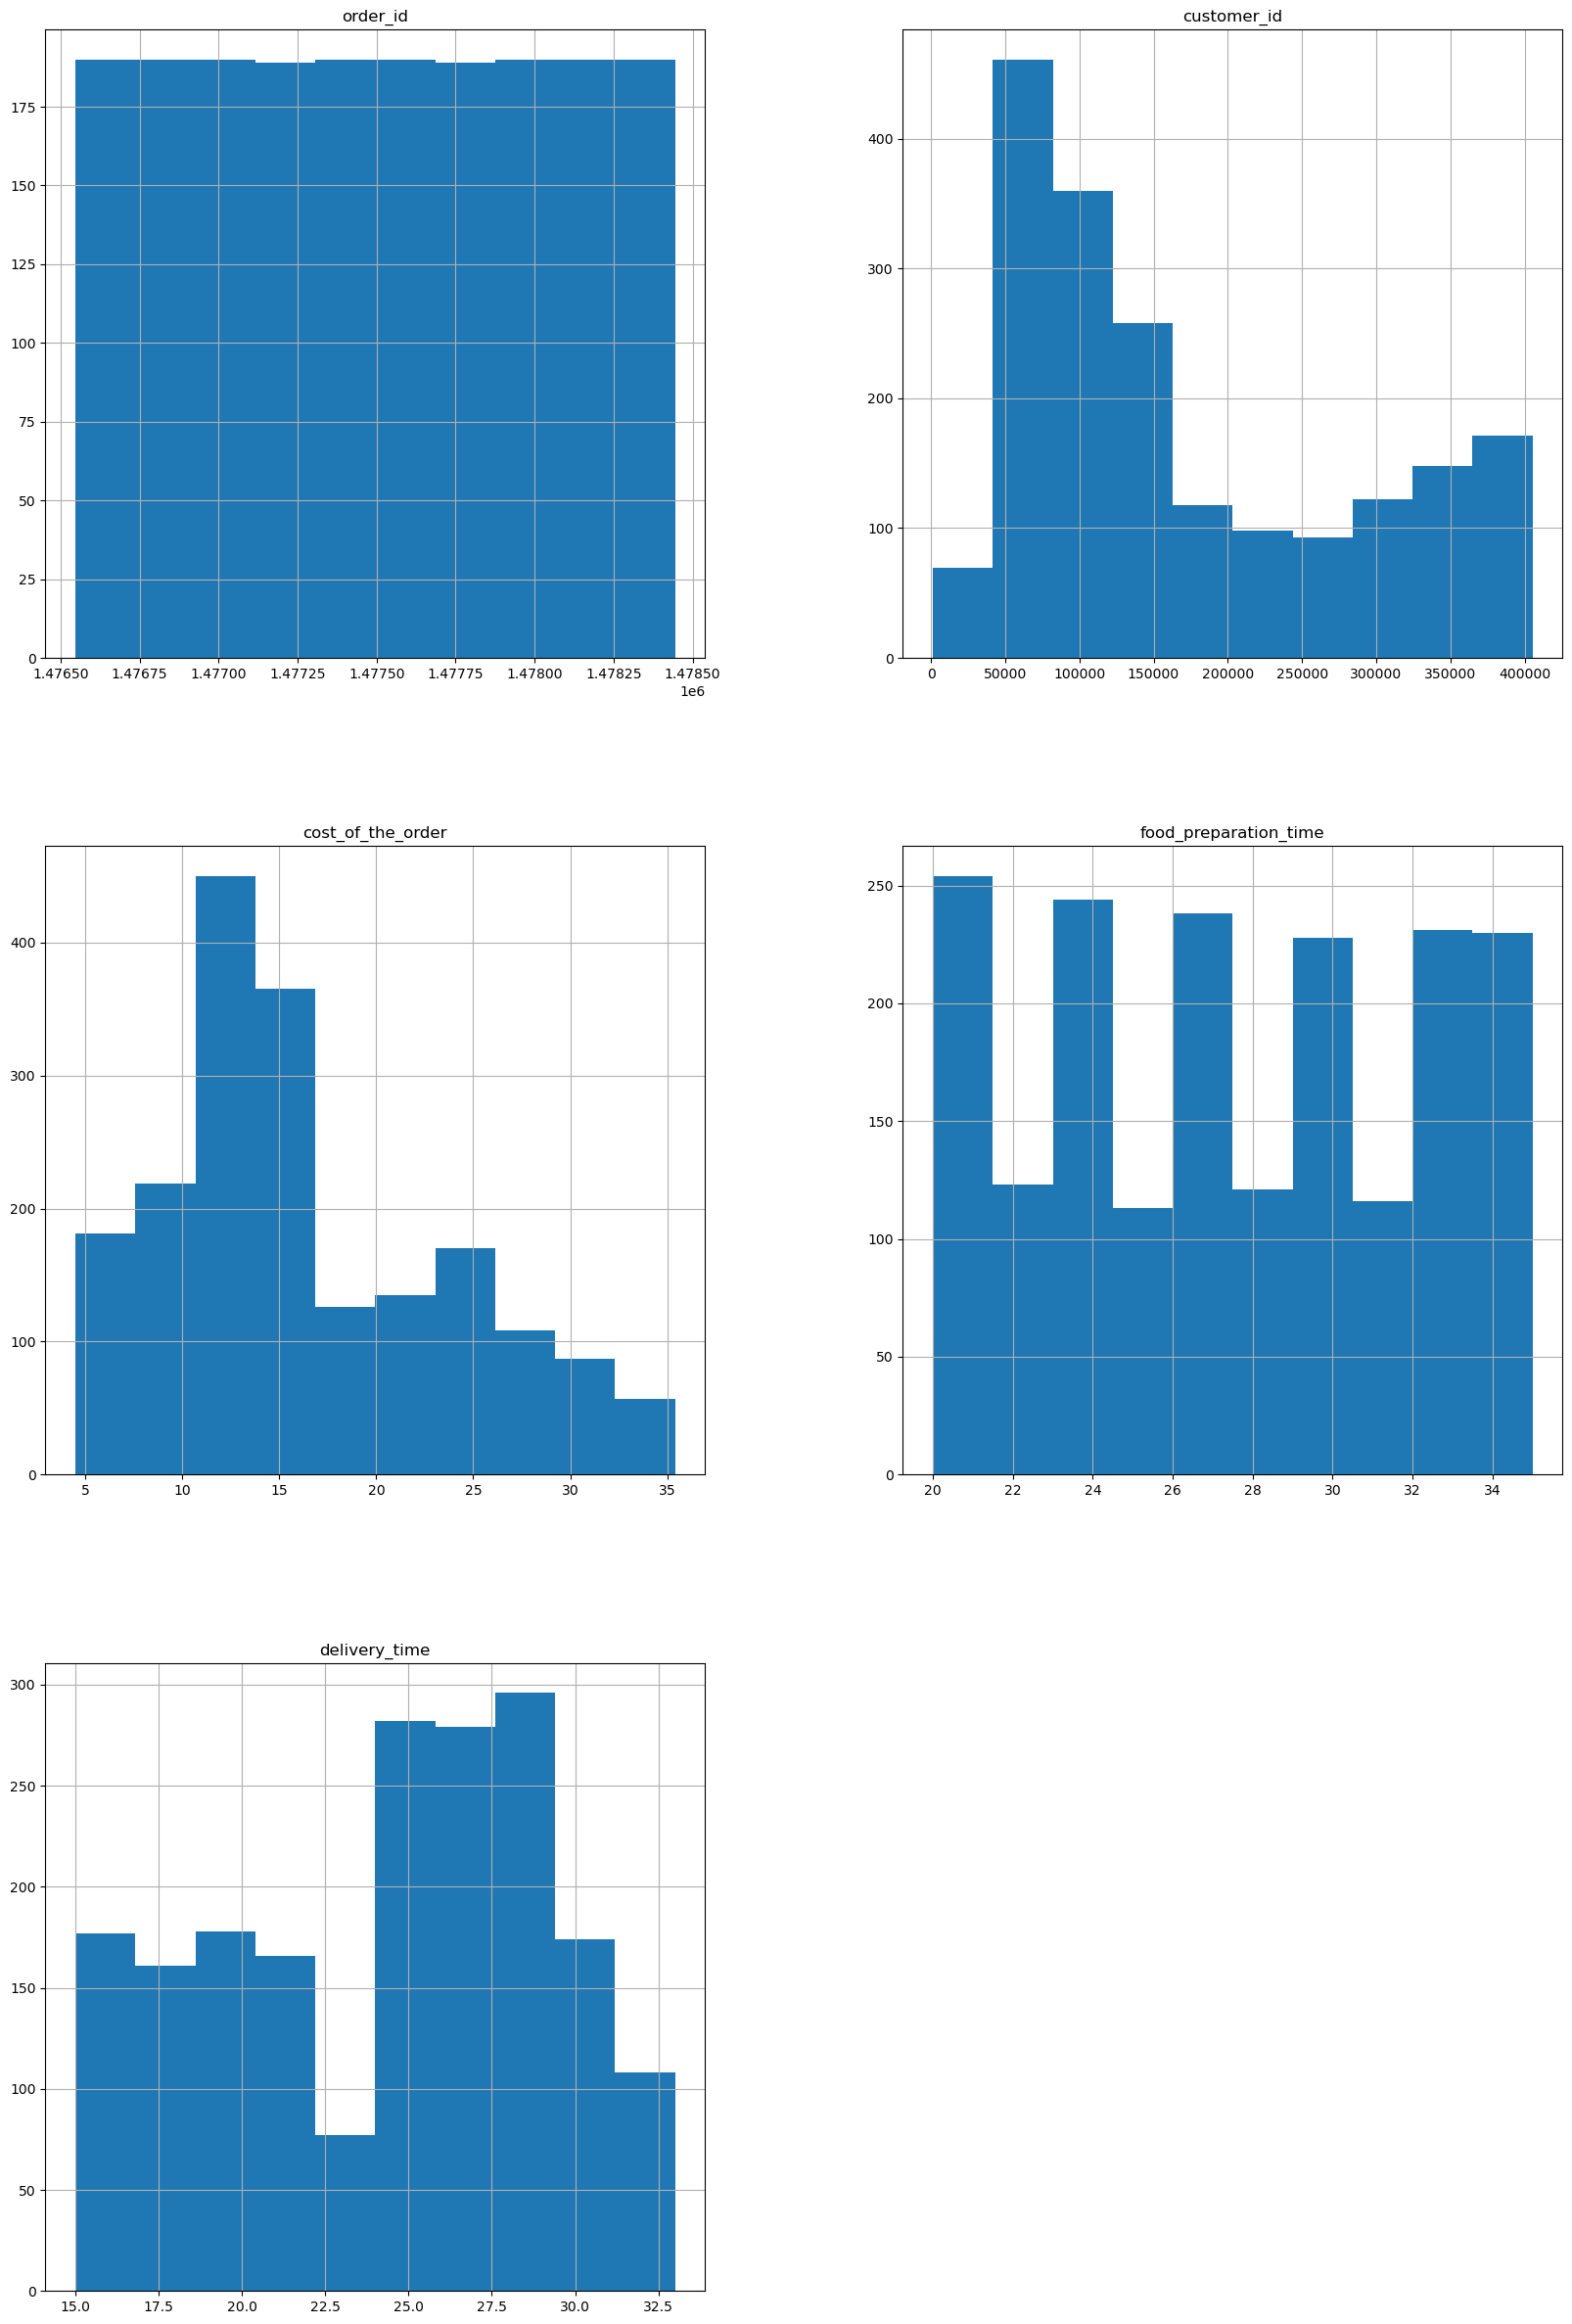

In [ ]:
#exploring variables through histrogam
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df.hist(figsize=(20,30))

Text(0.5, 1.0, 'Top 35 Restaurants by Order Count')

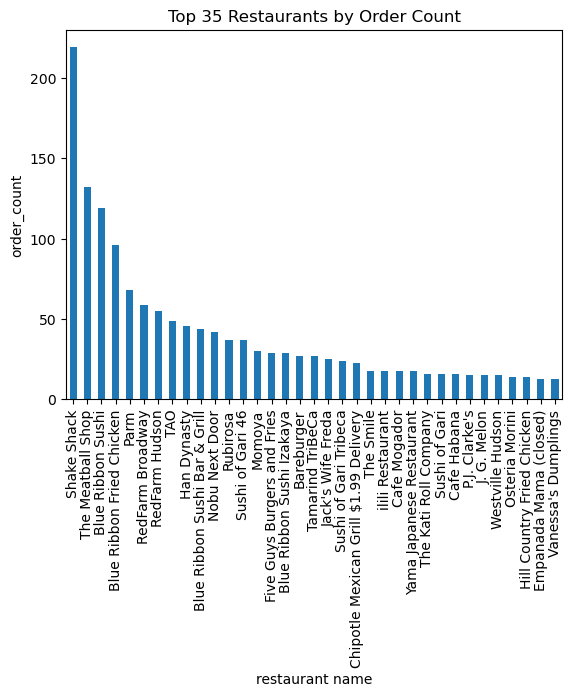

In [ ]:
# Exploring non-numeric variables
# visualizing the top 35 restaurants by order count
df.restaurant_name.value_counts().head(35).plot(kind='bar')
#labeling the axes in the plot
plt.xlabel('restaurant name')
plt.ylabel('order_count')
#adding the title to the plot
plt.title('Top 35 Restaurants by Order Count')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

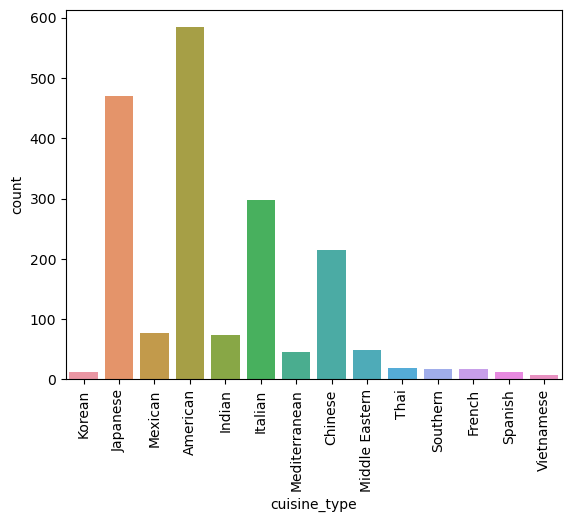

In [ ]:
#visualizing each cuisine type and its total count.
sns.countplot(x=df.cuisine_type)
#rotating x- axes ticks vertically for better presentation.
plt.xticks(rotation='vertical')

<Axes: >

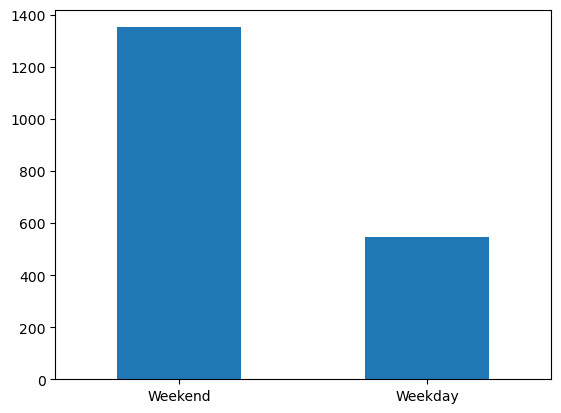

In [ ]:
#counting total orders with respect to the day of the week
df.day_of_the_week.value_counts().plot(kind='bar',rot=0)

Text(0.5, 1.0, 'Order Ratings')

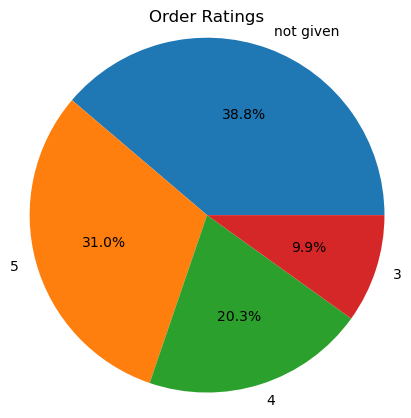

In [ ]:
#using pie plot to visualize the each rating percentage
plt.pie(df.rating.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['not given', '5','4','3'])
#adding title to the chart
plt.title('Order Ratings')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fafefb4c610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fafefb4cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fafefb4c370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fafefb4d090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fafefb4d330>],
 'means': []}

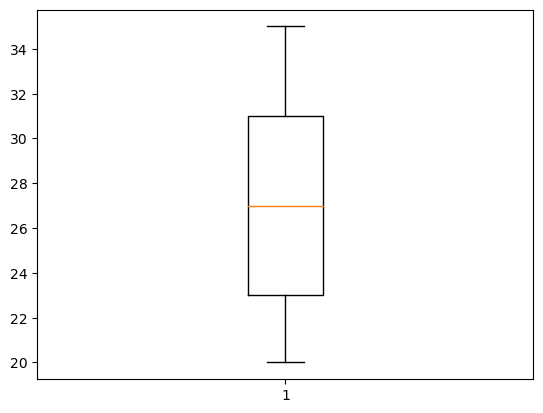

In [ ]:
#using box plot to have better representation of food preparation time.
plt.boxplot(df.food_preparation_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fafd92b17e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fafd92b1d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fafd92b1540>],
 'medians': [<matplotlib.lines.Line2D at 0x7fafd92b2260>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fafd92b2500>],
 'means': []}

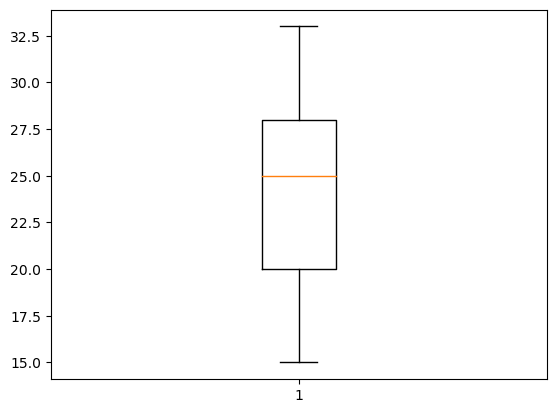

In [ ]:
#using box plot to have better representation of food delivery time
plt.boxplot(df.delivery_time)

#### Observation

1. There are no visible outliers in any of the Variable of the dataset.

2. Most of the orders cost between 10-15 dollars.

3. Shake shak has the highest number of orders in any day of the week.

4. American and Japanese cuisines are the most popular cuisine in the given data set.

5. large number of orders are placed on weekends rather than weekdays.

6. As the rating pie chart is concerned more than 38% of the orders are 'not given', after that more than 30% of the orders are rated 5 and rest 20.3% and 9.9% are rated as 4 and 3 respectively.

7. The distribution of Food preparation time is normal skewed which most of the orders are prepared on the mean time but the distribution for delivery time is negative skewed as mean < median, also most of the order delivery time is concentrated towards the higher values.


In [ ]:
# to find the 5 top restaurants with respect to orders recieved
df.restaurant_name.value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


1. Top five restaurants with most orders are Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried Chicken, and Parm.
2. shake shak has the highest number of orders wirh 219 orders.

In [ ]:
#to find the total number of cuisine type for each day of the week category
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:


It is observed that American cuisine is the most popular cuisine on weekdays as well as weekends.

In [ ]:
#using order_count to store the total count of orders that cost greater than 20 dollars
order_count= df[df['cost_of_the_order'] > 20]['order_id'].count()
#using total_order to store the count of total orders
total_order= df['order_id'].count()
#to find the percentage of orders above 20 dollars
percentage=(order_count/total_order)*100


29.24130663856691


#### Observations:


Around 29.2413 of the total orders cost more than 20 dollars

In [ ]:
# checking the mean order delivery time
df.delivery_time.mean()

24.161749209694417

#### Observations:


The mean order delivery time is around 24.161 minutes.

In [ ]:
# finding the top three frequent customer
#using head(3) to print the top 3 of the customers
df.customer_id.value_counts().head(3).sort_values(ascending=False)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


As per the observation, 52832, 47440 and ,83287 are the customer ids of three top frequent customers.

### Multivariate Analysis

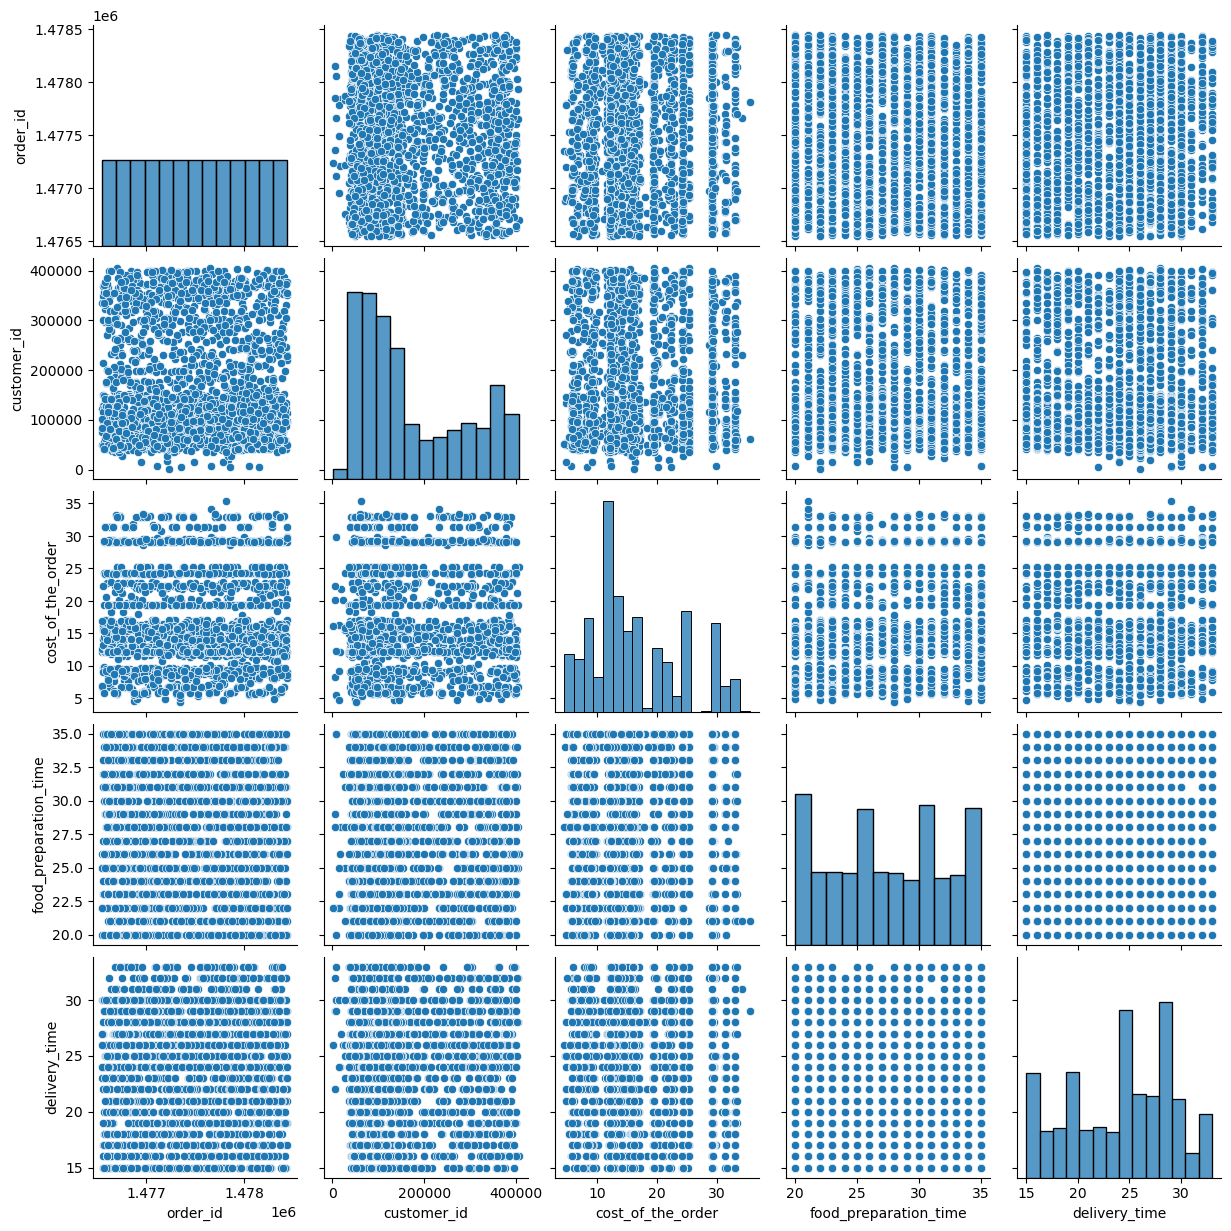

In [ ]:
# using pairplot to visulaize the relationship between all numerical variables in the dataset
sns.pairplot(df)

array([<Axes: title={'center': 'Weekday'}>,
       <Axes: title={'center': 'Weekend'}>], dtype=object)

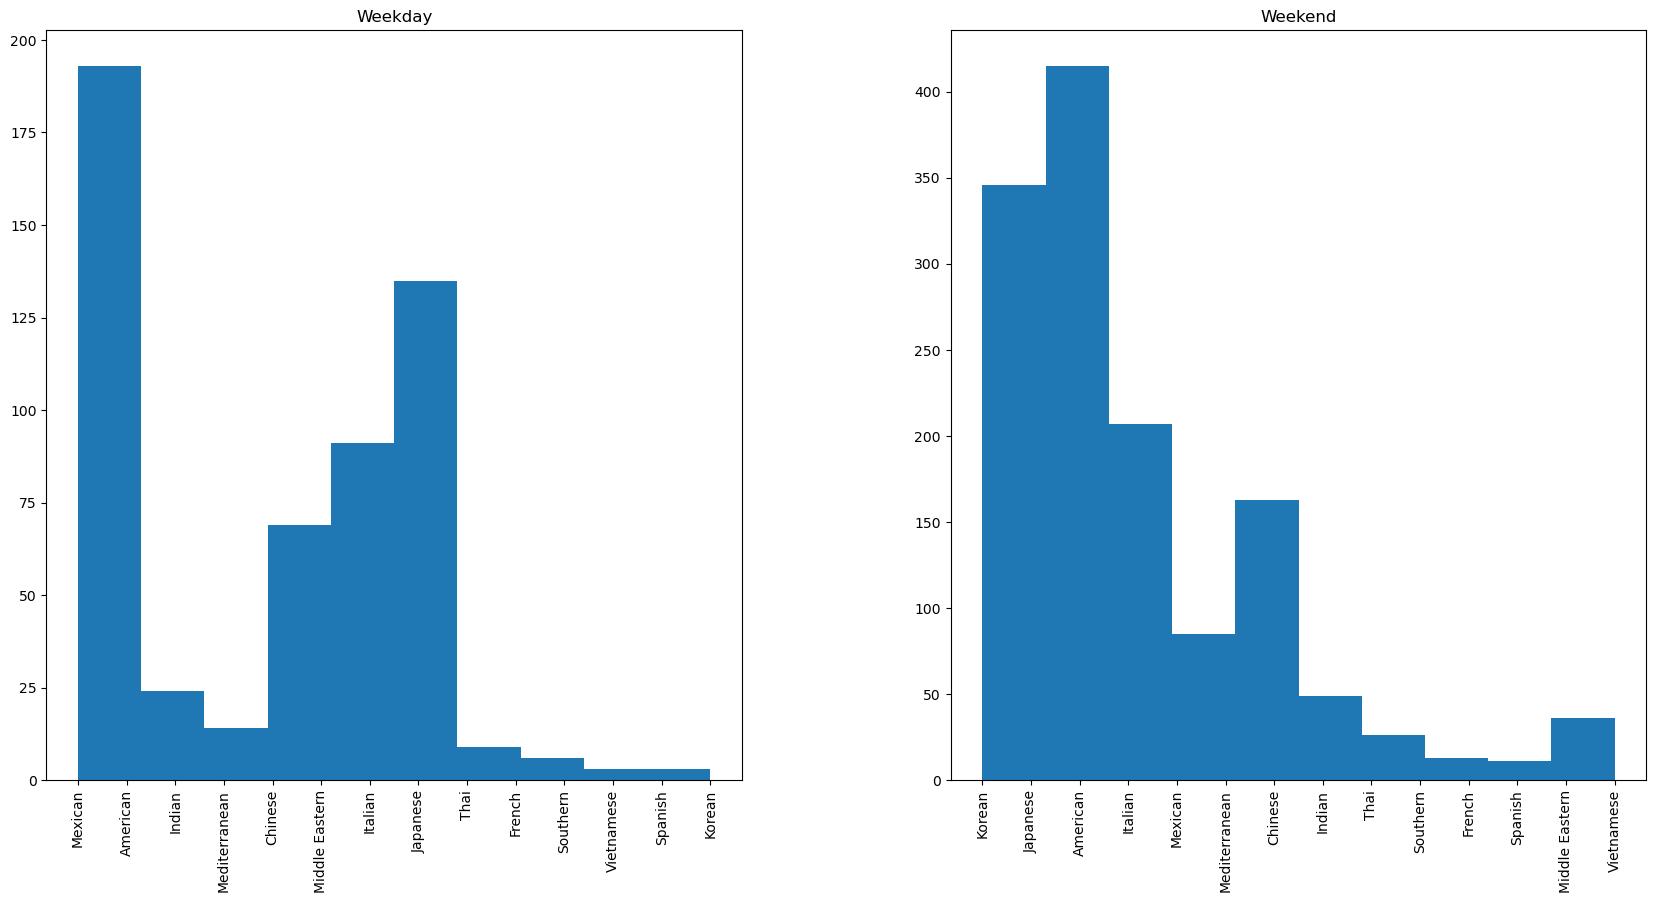

In [ ]:
#visualizing the cuisine_type with respect to the day_of_the_week
#using hist to plot the histrogram
df.hist(by='day_of_the_week', column='cuisine_type', figsize=(20, 10))

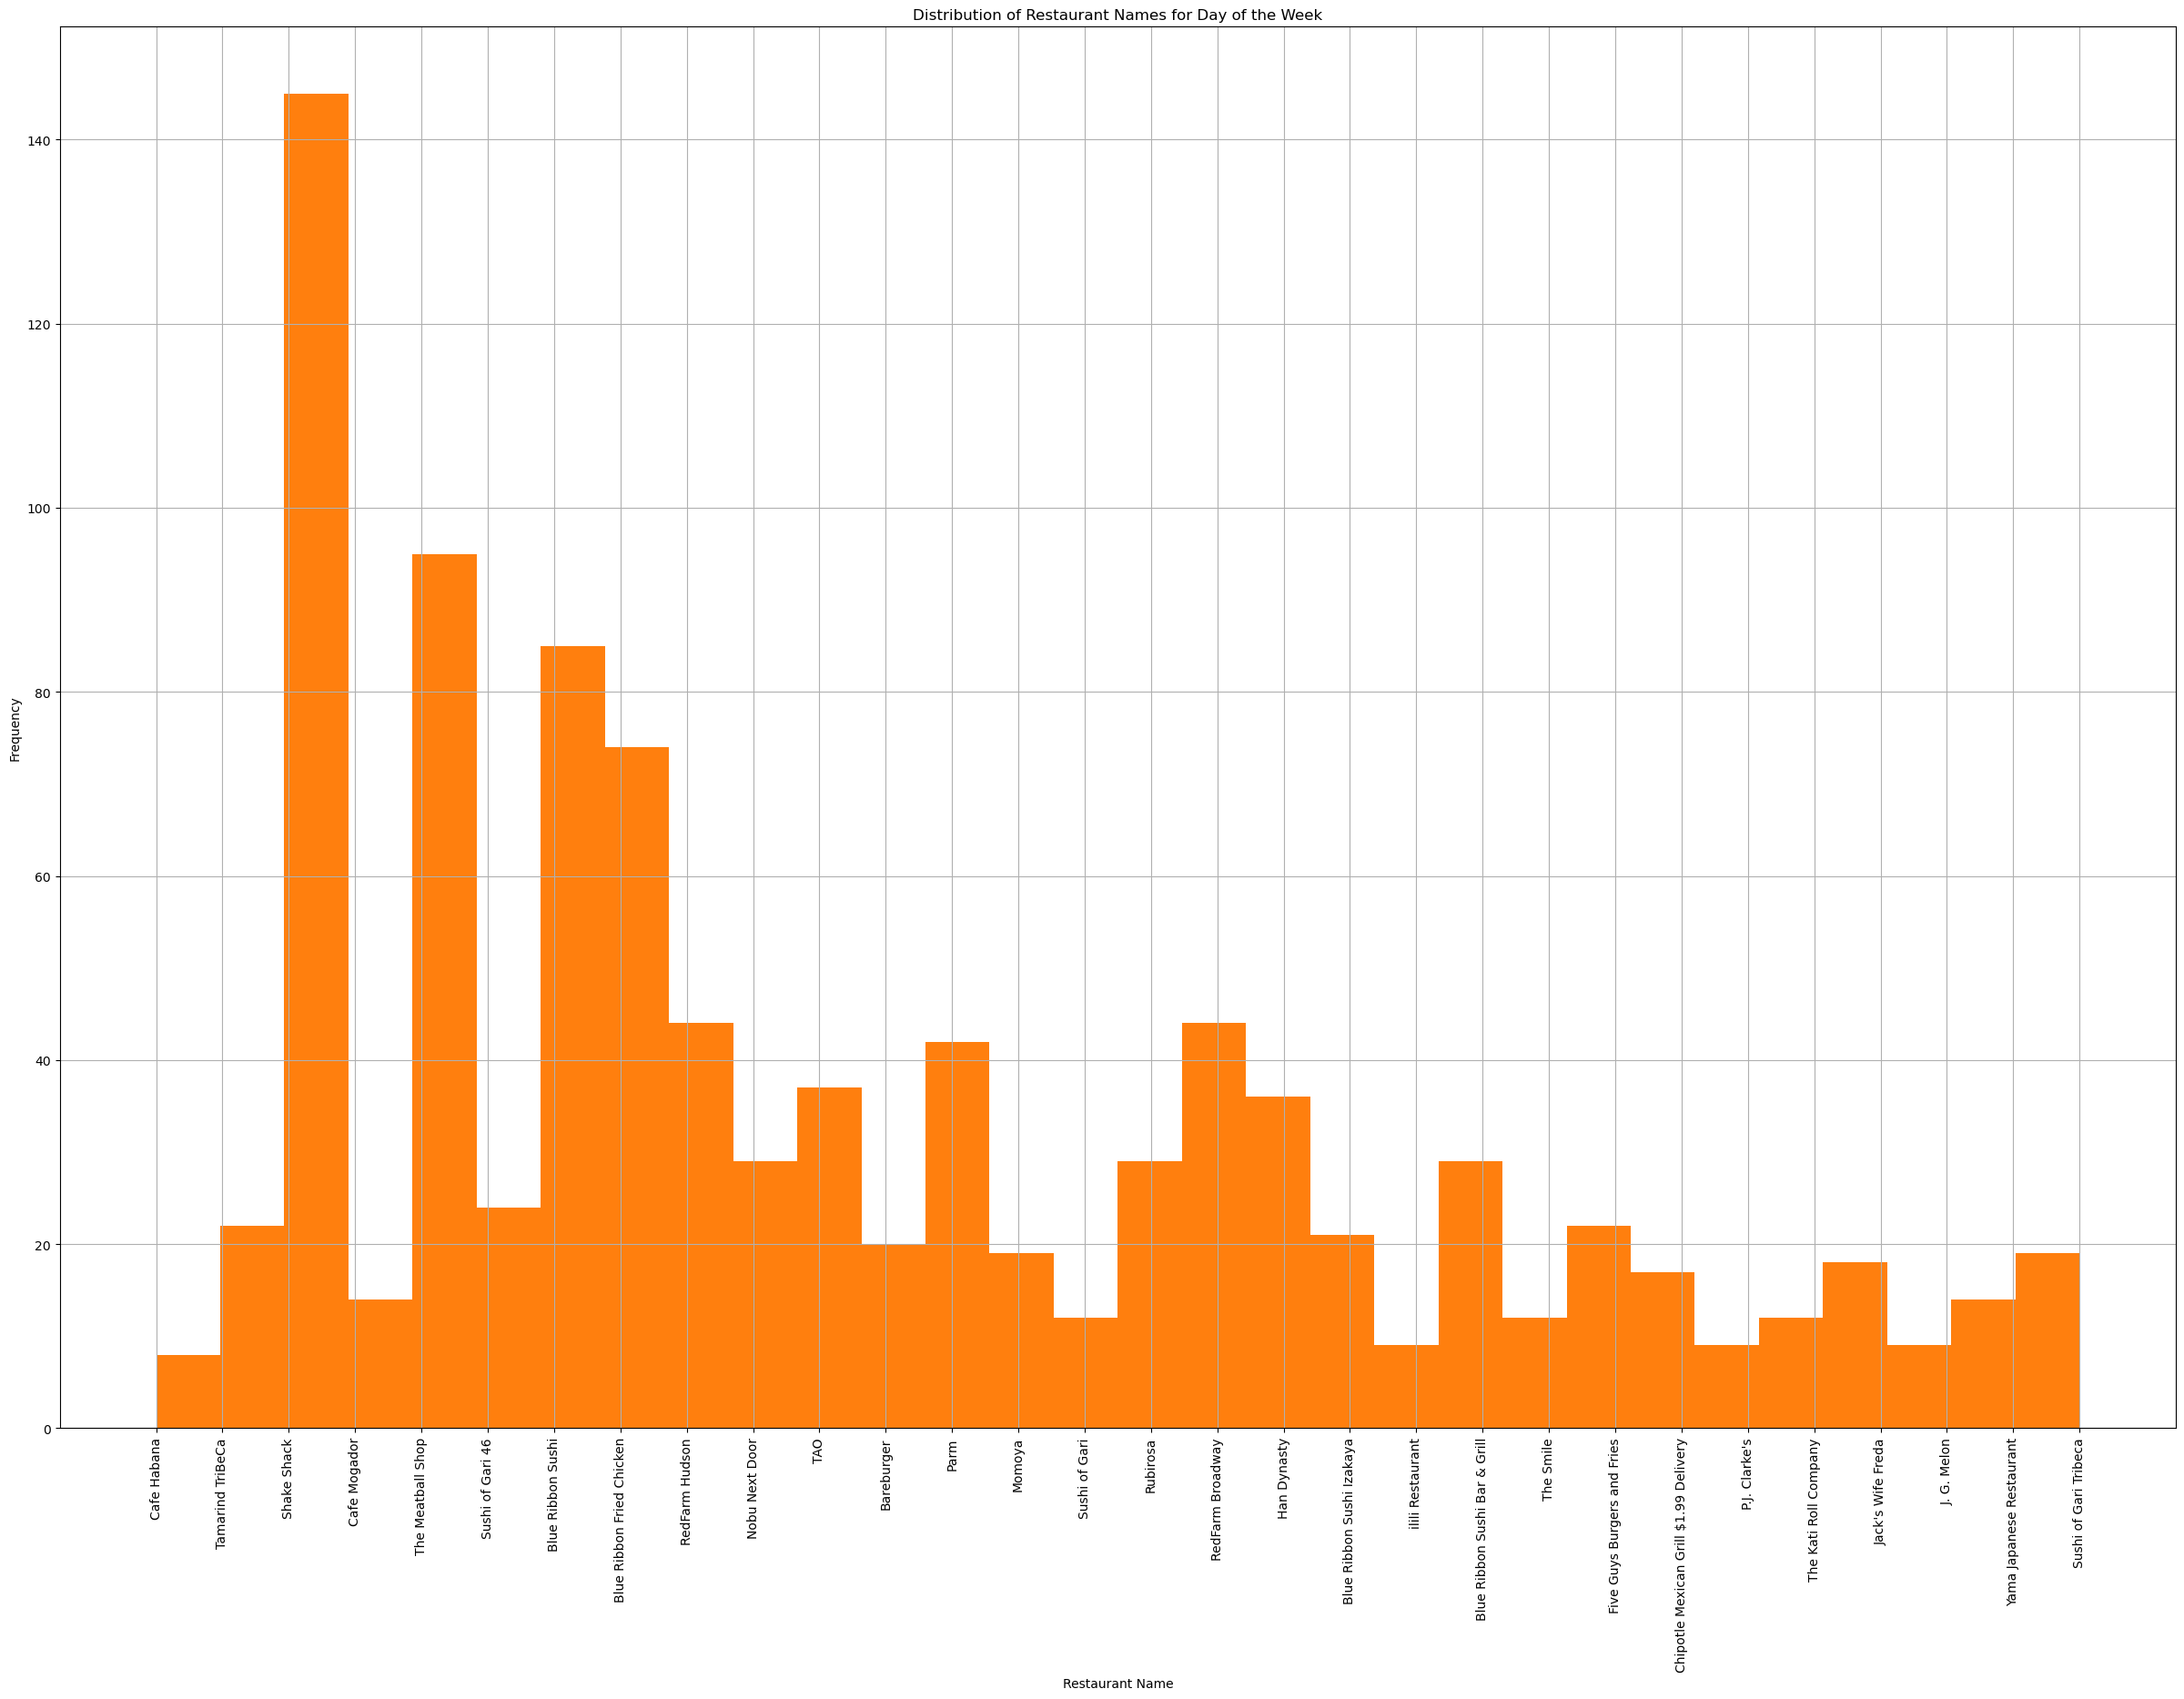

In [ ]:
#visualizing the top 30 restaurants with respect to the day_of_the_week
top_restaurant=df.restaurant_name.value_counts().head(30)
fig, axes = plt.subplots(figsize=(30, 20))
df[df['restaurant_name'].isin(top_restaurant.index)].groupby('day_of_the_week')['restaurant_name'].hist(ax=axes, bins=len(top_restaurants))
# Customize the plot
plt.xlabel('Restaurant Name')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Names for Day of the Week')
# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')
# Display the plot
plt.show()




#### observations:

1. We have observed that there is no visible dependency of one varaible on another.
2. for non-numeric values , the analysis for weekends and weekdays cuisine shows that the american and japanese are the two most popular cuisine.
3. Also we have analyzed the top 30 retaurants for any day of the week and in which shake shack and the meatball shops are the most favourite ones.

In [ ]:
#creating new data frame with no rating 'Not given'
df.new_df = df[df['rating'] != 'Not given']
#changing the datatype of the variable'Rating' to numeric
new_df['rating_new'] = pd.to_numeric(new_df['rating'], errors='coerce').astype('Int64')
#finding restaurants having a rating count of more than 50 and the average mean greater than 4.
df.promotion=new_df.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50 and x['rating_new'].mean() > 4)
#to display the all restaurant names.
df.promotion.restaurant_name.unique()


array(['Blue Ribbon Fried Chicken', 'The Meatball Shop', 'Shake Shack',
       'RedFarm Hudson', 'Blue Ribbon Sushi', 'Parm', 'RedFarm Broadway'],
      dtype=object)

#### Observations:


The following 7 restaurants have rating count of 50 and average rating greater than 4;

1.Blue Ribbon Fried Chicken

2.he Meatball Shop

3.Shake Shack

4.RedFarm Hudson

5.Blue Ribbon Sushi

6.Parm

7.RedFarm Broadway

In [ ]:
#calculating revenue on above 20 and above 5 dollars
twenty_dollars = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25
five_dollars = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15
# Calculate the total net revenue
total_revenue = twenty_dollars + five_dollars
# Display the net revenue
print(total_revenue)

6166.303


#### Observations:


company generated total 6166.03 dollars across all orders

In [ ]:
#total time required(food preparation time plus delivery)
df.total_time=df.food_preparation_time + df.delivery_time
#orders that take more than 60 minutes
total_orders=df.order_id.count()
od_1=df[df.total_time > 60]['order_id'].count()
#percentage of those orders
percentage=(od_1/total_orders)*100
print(percentage)

10.537407797681771


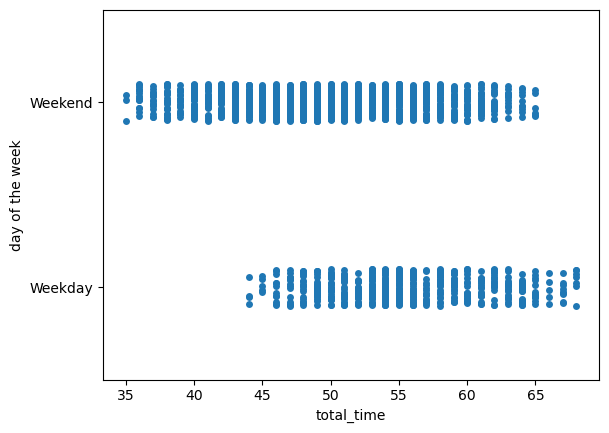

In [ ]:
#visualizing the total_time with respect to the total time
X = df.total_time
Y = df.day_of_the_week
# plot the strip plot
sns.stripplot(x=X,y=Y)
# add the axes labels to the plot
plt.xlabel('total_time')
plt.ylabel('day of the week')
# display the plot
plt.show()


#### Observations:


1. Around 10.53% of total orders took more than 60 minutes of total time to deliver the food.

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

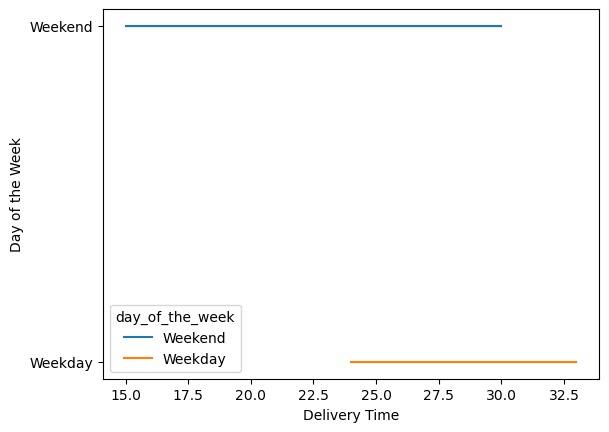

In [ ]:
#Create the line plot with different colors for each day of the week
sns.lineplot(x='delivery_time', y='day_of_the_week', hue='day_of_the_week', data=df, errorbar=('ci', 0))
# Set the labels for the x-axis and y-axis
plt.xlabel('Delivery Time')
plt.ylabel('Day of the Week')
# Display the plot
plt.show()

#### Observations:


1.The mean delivery time on weekday and weekends are 28.34 min and 22.47 min respectively

2.Delivery time ranges between 15 min to 30 min on weekends.

3.Delivery time ranges between 25 min to around 33 min on weekdays.

### Conclusion and Recommendations

### Conclusions:
* Shake shack is stable restaurant in terms of no. of orders and overall ratings. Whereas meat ball shop and the blue ribbon sushi has shown potential to grow further.
* More than half of the total orders are placed on Weekends, even the delivery time is faster on weekends than weekdays.
* cuisine type doesn't vary for the week of the day, American and japanese cuisine are the most popular cuisine any day of the week. However Itlaian and chinese cuisines have shown the potentialto grow further.

### Recommendations:
* Delivery time must be improved during the weekdays to ensure better services, also deals and promotions should be introduced in weekdays so to improve the total no. of counts.
* introduce a reward system on reviews and ratings, so that most of the people are motivated to give feedback rating which will help in analyzing the restaurants better.
* More Italian and Chinese cuisine type restaurants should be on boarded, as these are theese cuisines have the potential to grow.

---